<a href="https://colab.research.google.com/github/Xin-overclocked/pns/blob/main/Elysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/athlete_events.csv')

In [46]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [47]:
# Select only the 'Age', 'Weight', and 'Medal' columns
df = df[['Sport', 'Age', 'Weight', 'Medal']]

# Handle missing values
df = df.dropna(subset=['Sport', 'Age', 'Weight'])

In [48]:
print(f"Sample Size: {df.shape[0]}")

Sample Size: 207379


In [49]:
df

,Sport,Age,Weight,Medal
0,Basketball,24.0,80.0,NaN
1,Judo,23.0,60.0,NaN
4,Speed Skating,21.0,82.0,NaN
5,Speed Skating,21.0,82.0,NaN
6,Speed Skating,25.0,82.0,NaN
...,...,...,...,...
271111,Luge,29.0,89.0,NaN
271112,Ski Jumping,27.0,59.0,NaN
271113,Ski Jumping,27.0,59.0,NaN
271114,Bobsleigh,30.0,96.0,NaN


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Medal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Medal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Medal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Medal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Weight', y='Medal', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

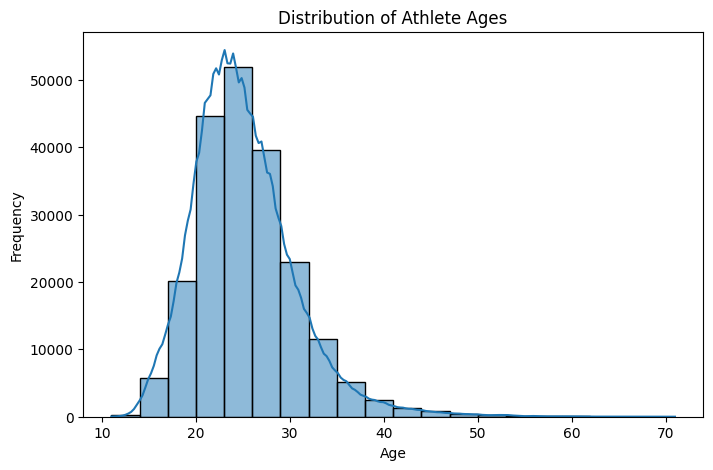

In [50]:

# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

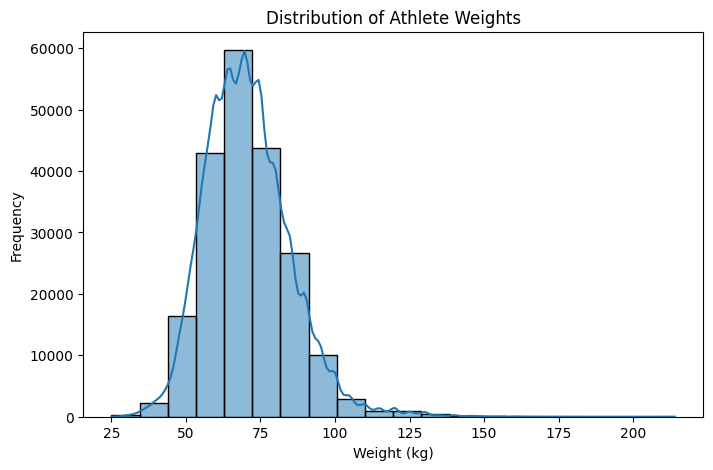

In [51]:
# 2. Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


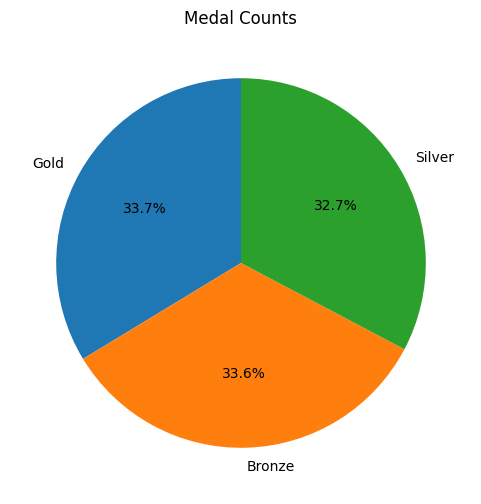

In [52]:
# 3. Medal Proportion
medal_counts = df['Medal'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Medal Counts')
plt.show()

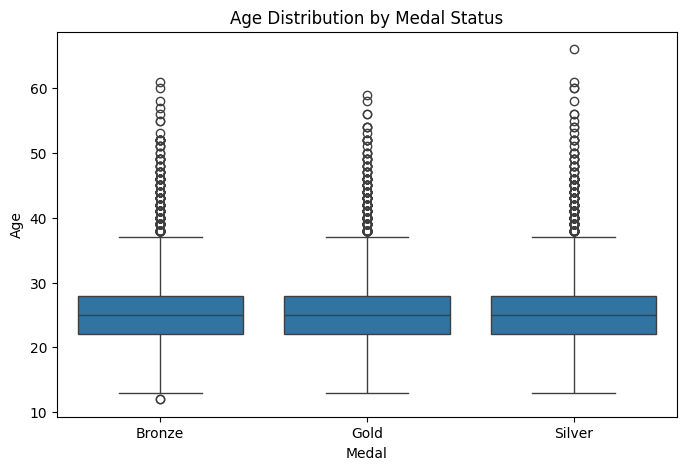

In [53]:
# 4. Age vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Age Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

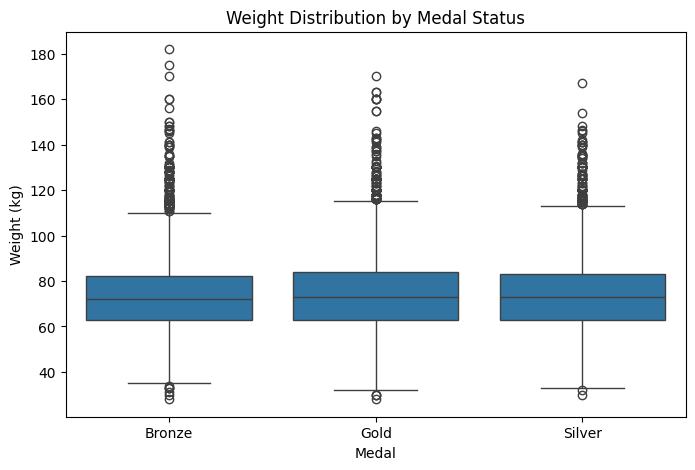

In [54]:

# 5. Weight vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Weight', data=df)
plt.title('Weight Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Weight (kg)')
plt.show()

T-statistic (Age): 12.788271812503153
P-value (Age): 1.96988488028913e-37


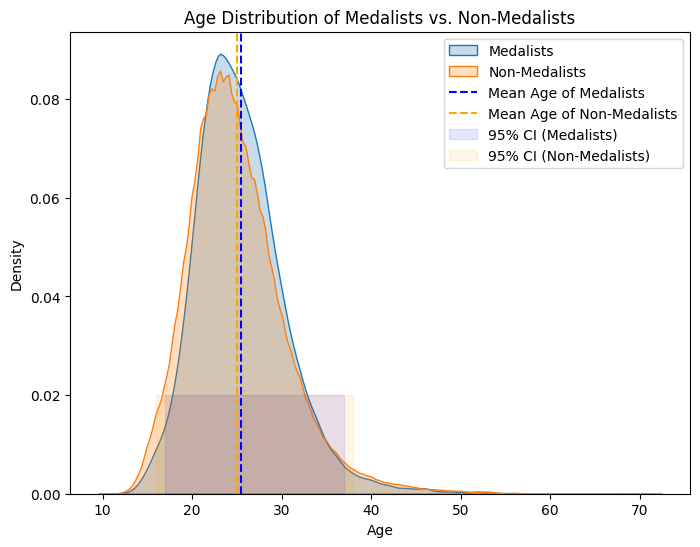

Reject the null hypothesis. There is a significant difference in age between medalists and non-medalists.


In [58]:
from scipy.stats import ttest_ind
# Define medalists and non-medalists
medalists = df[df['Medal'].notnull()]
non_medalists = df[df['Medal'].isnull()]
# Perform an independent samples t-test for Age
t_stat_age, p_value_age = ttest_ind(medalists['Age'], non_medalists['Age'])

# Print the results for age
print(f"T-statistic (Age): {t_stat_age}")
print(f"P-value (Age): {p_value_age}")

# Visualize the results with a plot (Age distribution)
plt.figure(figsize=(8, 6))

# Plotting Kernel Density Estimation (KDE) for age distribution
sns.kdeplot(medalists['Age'], label='Medalists', fill=True)
sns.kdeplot(non_medalists['Age'], label='Non-Medalists', fill=True)

# Plotting the mean age as vertical lines
plt.axvline(x=medalists['Age'].mean(), color='blue', linestyle='--', label='Mean Age of Medalists')
plt.axvline(x=non_medalists['Age'].mean(), color='orange', linestyle='--', label='Mean Age of Non-Medalists')

# Plotting Confidence Interval (95%) for the mean
medalists_ci = np.percentile(medalists['Age'], [2.5, 97.5])
non_medalists_ci = np.percentile(non_medalists['Age'], [2.5, 97.5])

# Plotting the confidence interval as shaded areas
plt.fill_betweenx([0, 0.02], medalists_ci[0], medalists_ci[1], color='blue', alpha=0.1, label='95% CI (Medalists)')
plt.fill_betweenx([0, 0.02], non_medalists_ci[0], non_medalists_ci[1], color='orange', alpha=0.1, label='95% CI (Non-Medalists)')

# Labeling the axes and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Medalists vs. Non-Medalists')

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Summarize the findings for age
alpha = 0.05
if p_value_age < alpha:
    print("Reject the null hypothesis. There is a significant difference in age between medalists and non-medalists.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age between medalists and non-medalists.")





T-statistic (Weight): 40.444028078085346
P-value (Weight): 0.0


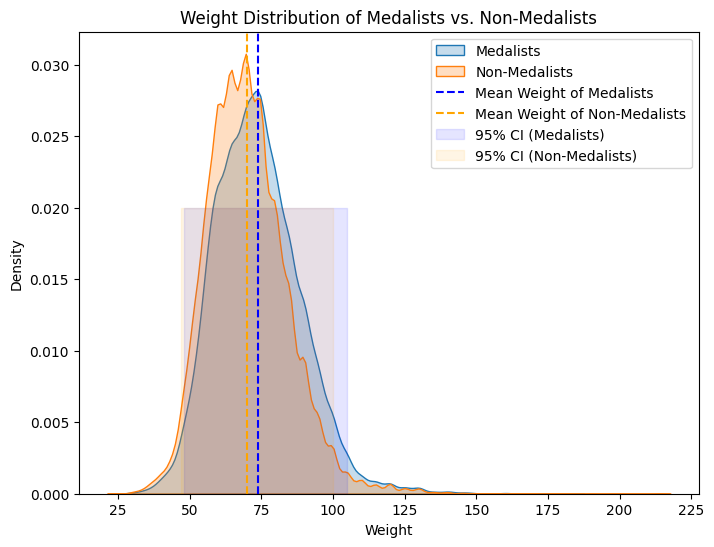

Reject the null hypothesis. There is a significant difference in weight between medalists and non-medalists.


In [59]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Perform an independent samples t-test for Weight
t_stat_weight, p_value_weight = ttest_ind(medalists['Weight'], non_medalists['Weight'])

# Print the results for weight
print(f"T-statistic (Weight): {t_stat_weight}")
print(f"P-value (Weight): {p_value_weight}")

# Visualize the results with a plot (Weight distribution)
plt.figure(figsize=(8, 6))

# Plotting Kernel Density Estimation (KDE) for weight distribution
sns.kdeplot(medalists['Weight'], label='Medalists', fill=True)
sns.kdeplot(non_medalists['Weight'], label='Non-Medalists', fill=True)

# Plotting the mean weight as vertical lines
plt.axvline(x=medalists['Weight'].mean(), color='blue', linestyle='--', label='Mean Weight of Medalists')
plt.axvline(x=non_medalists['Weight'].mean(), color='orange', linestyle='--', label='Mean Weight of Non-Medalists')

# Plotting Confidence Interval (95%) for the mean
medalists_ci = np.percentile(medalists['Weight'], [2.5, 97.5])
non_medalists_ci = np.percentile(non_medalists['Weight'], [2.5, 97.5])

# Plotting the confidence interval as shaded areas
plt.fill_betweenx([0, 0.02], medalists_ci[0], medalists_ci[1], color='blue', alpha=0.1, label='95% CI (Medalists)')
plt.fill_betweenx([0, 0.02], non_medalists_ci[0], non_medalists_ci[1], color='orange', alpha=0.1, label='95% CI (Non-Medalists)')

# Labeling the axes and title
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Weight Distribution of Medalists vs. Non-Medalists')

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Summarize the findings for weight
alpha = 0.05
if p_value_weight < alpha:
    print("Reject the null hypothesis. There is a significant difference in weight between medalists and non-medalists.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in weight between medalists and non-medalists.")


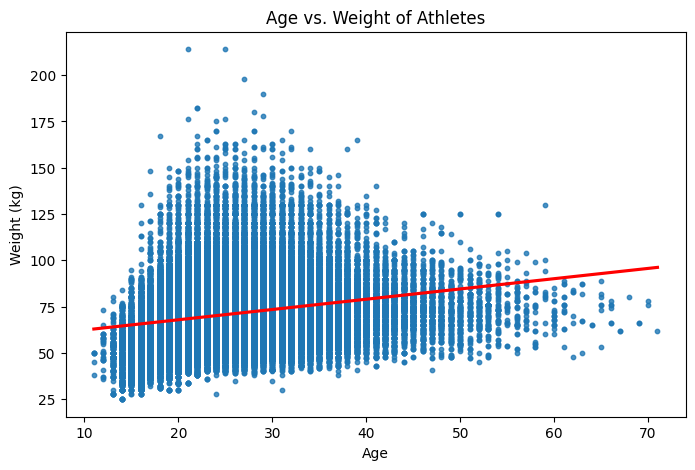

Correlation Coefficient between Age and Weight: 0.21


In [60]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear trend line (using Seaborn's `regplot` to add the regression line)
plt.figure(figsize=(8, 5))

sns.regplot(x='Age', y='Weight', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding titles and labels
plt.title('Age vs. Weight of Athletes')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Show plot
plt.show()

# Calculate the correlation coefficient between Age and Weight
correlation = df[['Age', 'Weight']].corr().iloc[0, 1]
print(f"Correlation Coefficient between Age and Weight: {correlation:.2f}")